In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import *

%matplotlib inline

In [2]:
# and prefix of input file name
fname_prefix = "simulated.N=10.Mu=2.0.GxP="
# suffix idication overlap type
overlap = "TT"
# where are output files
out_dir = "../JbiclustGE/simulated_data/"

# sizes of biclusters
g_sizes = [5,10,20,50,100]
s_sizes = [10,20,50,100]

# true biclusters 
true_bic_dir = "../simulated_datasets/true_biclusters/"
true_bic_fname_prefix = fname_prefix
true_bic_fname_suffix = ".overlap="+overlap+".biclusters.txt"

In [3]:
# predicted biclusters 
tool_name = "COALESCE"
tool_suffix = "COALESCE"
n_runs = 10

parameters = (("prob_gene",[0.99, 0.95, 0.9]),
              ("pvalue_cond",[0.01, 0.05, 0.1]),
              ("pvalue_correl",[0.01, 0.05, 0.1, 0.2, 0.5]),
              ("zscore_cond",[0.005,0.01, 0.05, 0.1]))  # 0.001,0.0005, 0.0001

pred_bic_dir =  out_dir+tool_name+"/"
pred_bic_fname_prefix = fname_prefix
pred_bic_fname_suffix = ".overlap="+overlap

img_outdir = "../simulated_datasets/results/J/img"
tsv_outdir = "../simulated_datasets/results/J/"



In [4]:
for g in g_sizes:
    for s in s_sizes:
        params_folder = "prob_gene=0.9,pvalue_cond=0.1,pvalue_correl=0.1,zscore_cond=0.05"
        pred_bic_fname = pred_bic_fname_prefix+str(g)+","+str(s)+pred_bic_fname_suffix
        bic_file_path = pred_bic_dir+params_folder+"/" + pred_bic_fname
        bics = parse_JBiclustGE(bic_file_path,n_runs=n_runs)[0]
        print(g,s,len(bics))

5 10 0
5 20 6
5 50 10
5 100 12
10 10 1
10 20 10
10 50 10
10 100 12
20 10 4
20 20 10
20 50 10
20 100 11
50 10 10
50 20 10
50 50 12
50 100 11
100 10 10
100 20 10
100 50 14
100 100 22


In [5]:
n_genes = 20
n_samples = 50
true_bic_fname = true_bic_fname_prefix+str(n_genes)+","+str(n_samples)+true_bic_fname_suffix 
true_bics = read_true_bics(true_bic_dir+true_bic_fname)

params_folder = "prob_gene=0.99,pvalue_cond=0.05,pvalue_correl=0.05,zscore_cond=0.05"
pred_bic_fname = pred_bic_fname_prefix+str(n_genes)+","+str(n_samples)+pred_bic_fname_suffix
pred_bic_fname
bic_file_path = pred_bic_dir+params_folder+"/" + pred_bic_fname
bic_file_path 

'../JbiclustGE/simulated_data/COALESCE/prob_gene=0.99,pvalue_cond=0.05,pvalue_correl=0.05,zscore_cond=0.05/simulated.N=10.Mu=2.0.GxP=20,50.overlap=TT'

In [6]:
runs = parse_JBiclustGE(bic_file_path,n_runs=n_runs)
for i in range(0,n_runs):
    pred_bics = runs[i] 
    print(i, len(pred_bics),np.mean(F1_per_bic(true_bics, pred_bics)), np.mean(J_relevance(true_bics, pred_bics)) )


0 10 0.9990099009900991 0.9980392156862745
1 10 0.9990099009900991 0.9980392156862745
2 10 0.9990099009900991 0.9980392156862745
3 10 0.9990099009900991 0.9980392156862745
4 10 0.9990099009900991 0.9980392156862745
5 10 0.9990099009900991 0.9980392156862745
6 10 0.9990099009900991 0.9980392156862745
7 10 0.9990099009900991 0.9980392156862745
8 10 0.9990099009900991 0.9980392156862745
9 10 0.9990099009900991 0.9980392156862745


In [7]:
results= read_all_results(parameters,tool_name,n_runs=n_runs, parse_biclust_func=parse_JBiclustGE,
                          pred_bic_dir=pred_bic_dir,
                          pred_bic_fname_prefix=fname_prefix,
                          pred_bic_fname_suffix=pred_bic_fname_suffix,
                          true_bic_dir=true_bic_dir,
                          true_bic_fname_prefix=fname_prefix,
                          true_bic_fname_suffix=true_bic_fname_suffix,
                          param_folder_delim=",")
results_outfile =  tsv_outdir+ tool_suffix+".results.tsv"
results.to_csv(results_outfile ,sep="\t")
results.head(5)

Parameter combiations not found: 0
Successfull parameter combinations: 180
	files not found: 0
	files empty: 0
	failed to parse: 0
Total runs 52200
Non-zero runs: 45810


,n_genes,n_samples,zscore_cond,pvalue_cond,prob_gene,pvalue_correl,n_biclusters,Relevance,Recovery
0,5,10,0.005,0.01,0.99,0.01,10,0.0,0.0
1,5,10,0.005,0.01,0.99,0.01,10,0.0,0.0
2,5,10,0.005,0.01,0.99,0.01,10,0.0,0.0
3,5,10,0.005,0.01,0.99,0.01,10,0.0,0.0
4,5,10,0.005,0.01,0.99,0.01,10,0.0,0.0


In [8]:
results["Geometric_Mean"] = np.sqrt(results["Relevance"]*results["Recovery"])
results

,n_genes,n_samples,zscore_cond,pvalue_cond,prob_gene,pvalue_correl,n_biclusters,Relevance,Recovery,Geometric_Mean
0,5,10,0.005,0.01,0.99,0.01,10,0.000000,0.000000,0.000000
1,5,10,0.005,0.01,0.99,0.01,10,0.000000,0.000000,0.000000
2,5,10,0.005,0.01,0.99,0.01,10,0.000000,0.000000,0.000000
3,5,10,0.005,0.01,0.99,0.01,10,0.000000,0.000000,0.000000
4,5,10,0.005,0.01,0.99,0.01,10,0.000000,0.000000,0.000000
5,5,10,0.005,0.01,0.99,0.01,10,0.000000,0.000000,0.000000
6,5,10,0.005,0.01,0.99,0.01,10,0.000000,0.000000,0.000000
7,5,10,0.005,0.01,0.99,0.01,10,0.000000,0.000000,0.000000
8,5,10,0.005,0.01,0.99,0.01,10,0.000000,0.000000,0.000000
9,5,10,0.005,0.01,0.99,0.01,10,0.000000,0.000000,0.000000


In [9]:
parameters

(('prob_gene', [0.99, 0.95, 0.9]),
 ('pvalue_cond', [0.01, 0.05, 0.1]),
 ('pvalue_correl', [0.01, 0.05, 0.1, 0.2, 0.5]),
 ('zscore_cond', [0.005, 0.01, 0.05, 0.1]))

In [10]:
params = ["prob_gene","pvalue_cond","pvalue_correl","zscore_cond"]


Total combinations: 180
[(0.95, 0.1, 0.5, 0.05) (0.95, 0.05, 0.5, 0.01) (0.95, 0.05, 0.5, 0.005)
 (0.95, 0.05, 0.5, 0.1) (0.95, 0.1, 0.5, 0.005) (0.95, 0.1, 0.5, 0.01)
 (0.95, 0.1, 0.5, 0.1) (0.95, 0.05, 0.5, 0.05) (0.9, 0.1, 0.5, 0.05)
 (0.99, 0.1, 0.5, 0.05) (0.99, 0.05, 0.5, 0.1) (0.99, 0.05, 0.5, 0.005)
 (0.99, 0.05, 0.5, 0.01) (0.99, 0.1, 0.5, 0.1) (0.99, 0.1, 0.5, 0.01)
 (0.99, 0.1, 0.5, 0.005) (0.95, 0.1, 0.2, 0.05) (0.9, 0.05, 0.5, 0.01)
 (0.9, 0.05, 0.5, 0.005) (0.9, 0.05, 0.5, 0.1)]
Top 20 paramter combinations


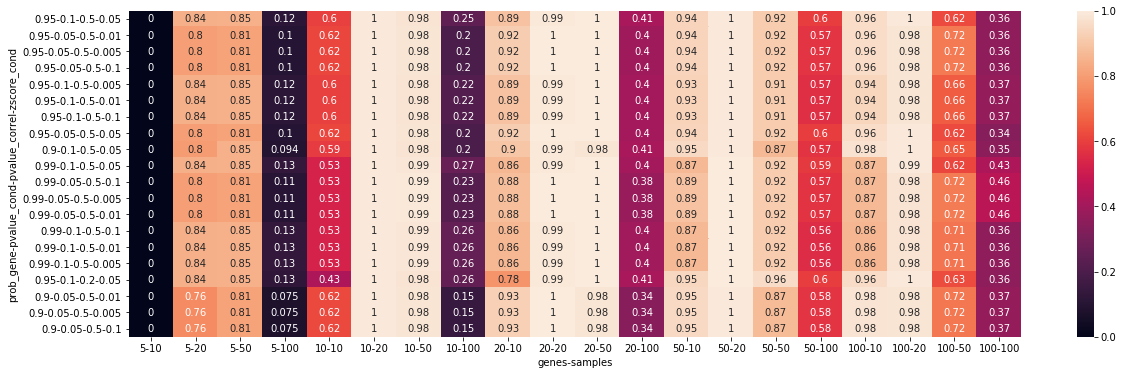

In [13]:
heatmap = plot_performance_heatmap(results,params,top=20, what="Geometric_Mean",
                          g_sizes = [5,10,20,50,100], s_sizes = [10,20,50,100],
                          plot=True)

In [14]:
heatmap.shape

(180, 20)

In [15]:
parameters

(('prob_gene', [0.99, 0.95, 0.9]),
 ('pvalue_cond', [0.01, 0.05, 0.1]),
 ('pvalue_correl', [0.01, 0.05, 0.1, 0.2, 0.5]),
 ('zscore_cond', [0.005, 0.01, 0.05, 0.1]))

In [16]:
default_params = (0.95,0.05,0.05,0.05)

In [17]:
r = get_opt_params(results, params, heatmap, default_params=default_params, what="Geometric_Mean", more_n_smaples = 0)
r

All 52200 runs considered

with Optimal parameters (Geometric_Mean --> max):
Geometric_Mean : 0.7159981369192451
(0.95, 0.1, 0.5, 0.05)
0.0	0.84	0.85	0.12	0.6	1.0	0.98	0.25	0.89	0.99	1.0	0.41	0.94	1.0	0.92	0.6	0.96	1.0	0.62	0.36
	prob_gene=('Geometric_Mean', 'mean');
	pvalue_cond=('Geometric_Mean', 'std');
	pvalue_correl=('Geometric_Mean', 'count');
	zscore_cond=('Relevance', 'mean');
	Max. avg. Geometric_Mean: 0.716 ± 0.319
	Max. avg. Relevance: 0.722 ± 0.336
	Max. avg. Recovery: 0.72 ± 0.314
	Max. avg. n_biclusters: 11.0 ± 3.355
With Default parameters:
(0.95, 0.05, 0.05, 0.05)
0.0	0.61	0.81	0.11	0.0	1.0	0.98	0.21	0.0	1.0	1.0	0.4	0.9	1.0	0.96	0.6	0.96	1.0	0.65	0.41
	prob_gene=0.95;
	pvalue_cond=0.05;
	pvalue_correl=0.05;
	zscore_cond=0.05;
	avg. Geometric_Mean: 0.629 ± 0.379
	avg. Relevance: 0.633 ± 0.389
	avg. Recovery: 0.63 ± 0.377
	avg. n_biclusters: 10.5 ± 2.205


,,,,Geometric_Mean,Relevance,Recovery,n_biclusters
,,,,mean,mean,mean,mean
prob_gene,pvalue_cond,pvalue_correl,zscore_cond,,,,
0.95,0.1,0.5,0.05,0.715998,0.722057,0.719823,11.0


In [69]:
heatmap.loc[r.index,:]

genes                                            5                        \
samples                                          10        20        50    
prob_gene pvalue_cond pvalue_correl zscore_cond                            
0.95      0.1         0.5           0.05         0.0  0.844027  0.850824   

genes                                                          10             \
samples                                               100      10        20    
prob_gene pvalue_cond pvalue_correl zscore_cond                                
0.95      0.1         0.5           0.05         0.115771  0.60227  0.995238   

genes                                                                     20   \
samples                                               50        100       10    
prob_gene pvalue_cond pvalue_correl zscore_cond                                 
0.95      0.1         0.5           0.05         0.979141  0.247354  0.890868   

genes                                                                          \
samples                                               20        50        100   
prob_gene pvalue_cond pvalue_correl zscore_cond                                 
0.95      0.1         0.5           0.05         0.990476  0.998039  0.414457   

genes                                                 50                       \
samples                                               10        20        50    
prob_gene pvalue_cond pvalue_correl zscore_cond                                 
0.95      0.1         0.5           0.05         0.940998  0.996039  0.915875   

genes                                                        100         \
samples                                               100    10     20    
prob_gene pvalue_cond pvalue_correl zscore_cond                           
0.95      0.1         0.5           0.05         0.595582  0.961  0.996   

genes                                                                
samples                                               50        100  
prob_gene pvalue_cond pvalue_correl zscore_cond                      
0.95      0.1         0.5           0.05         0.624912  0.361089